In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('train_df.csv')
mod_spotify_df = pd.read_csv('mod_spotify_songs.csv')
spotify_df = pd.read_csv('final_spotify_songs.csv')

In [4]:
train_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Mood Label
0,0.830,0.25100,4,-19.774,1,0.0779,0.980,0.893,0.195,0.1640,110.002,184364,ambient
1,0.227,0.00268,3,-27.348,1,0.0600,0.951,0.912,0.109,0.2280,64.260,146000,ambient
2,0.159,0.07100,6,-27.109,0,0.0409,0.911,0.856,0.107,0.0602,146.977,464293,ambient
3,0.150,0.20800,10,-16.901,1,0.0409,0.936,0.755,0.218,0.0759,85.706,322499,ambient
4,0.804,0.32500,2,-13.067,1,0.0469,0.601,0.588,0.601,0.3950,120.002,240250,ambient


In [5]:
mod_spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.565,0.962,8,-2.981,1,0.0640,0.437,0.000000,0.0560,0.906,148.808,160227
1,0.474,0.598,5,-5.023,1,0.0973,0.768,0.000000,0.0841,0.917,184.484,131853
2,0.647,0.582,10,-9.538,0,0.0755,0.410,0.000002,0.0715,0.915,167.396,146480
3,0.688,0.700,7,-6.295,1,0.0757,0.730,0.000000,0.7270,0.876,119.117,142547
4,0.168,0.326,5,-9.981,1,0.0324,0.721,0.000600,0.3160,0.322,174.794,182400


In [6]:
X_train = train_df.drop(columns=['Mood Label'])
y_train = train_df['Mood Label']

In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
X_predict = mod_spotify_df
predicted_moods = knn_classifier.predict(X_predict)

In [9]:
mod_spotify_df['predicted_mood'] = predicted_moods

In [10]:
spotify_df['predicted_mood'] = mod_spotify_df['predicted_mood']

In [11]:
accuracy = accuracy_score(y_train, knn_classifier.predict(X_train))
precision = precision_score(y_train, knn_classifier.predict(X_train), average='weighted')
recall = recall_score(y_train, knn_classifier.predict(X_train), average='weighted')
f1 = f1_score(y_train, knn_classifier.predict(X_train), average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.4150326797385621
Precision: 0.4261478113092392
Recall: 0.4150326797385621
F1 Score: 0.4145241496478348


In [12]:
mod_spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,predicted_mood
0,0.565,0.962,8,-2.981,1,0.0640,0.437,0.000000,0.0560,0.906,148.808,160227,epic
1,0.474,0.598,5,-5.023,1,0.0973,0.768,0.000000,0.0841,0.917,184.484,131853,focus
2,0.647,0.582,10,-9.538,0,0.0755,0.410,0.000002,0.0715,0.915,167.396,146480,happy
3,0.688,0.700,7,-6.295,1,0.0757,0.730,0.000000,0.7270,0.876,119.117,142547,happy
4,0.168,0.326,5,-9.981,1,0.0324,0.721,0.000600,0.3160,0.322,174.794,182400,upbeat


In [13]:
spotify_df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,predicted_mood
0,7DJsL4jyXA39GDiHFQYQ0t,Mess Around,Ray Charles,"Ah, you can talk about the pit barbecue The ba...",59,0cw6Sv7IwZ87aLPPvNPSd0,"Ray Charles (aka: Hallelujah, I Love Her So)",1957-01-01,r&b,urban contemporary,...,-2.981,1,0.0640,0.437,0.000000,0.0560,0.906,148.808,160227,epic
1,6qb0O5HW7H4q6R0AbP38Ko,Long Tall Sally (The Thing),Little Richard,Going to tell Aunt Mary about Uncle John He cl...,1,4CfyfJWb1HSabAjdcLeThs,Here's Little Richard [Remastered & Expanded],1957-03-01,rock,classic rock,...,-5.023,1,0.0973,0.768,0.000000,0.0841,0.917,184.484,131853,focus
2,4gphxUgq0JSFv2BCLhNDiE,Jailhouse Rock,Elvis Presley,The warden threw a party in the county jail Th...,73,0C3t1htEDTFKcg7F2rNbek,Elvis' Golden Records,1958-03-21,rock,classic rock,...,-9.538,0,0.0755,0.410,0.000002,0.0715,0.915,167.396,146480,happy
3,7jER4hFurkqwYmeat3qsh5,Jingle Bells,Ella Fitzgerald,Dashing through the snow In a one-horse open s...,11,15up0e6AFIYZbmErIVPU3p,Ella Wishes You A Swinging Christmas (Expanded...,1960-01-01,r&b,neo soul,...,-6.295,1,0.0757,0.730,0.000000,0.7270,0.876,119.117,142547,happy
4,0CmIALzGn4vHIHJG4n3Q4z,At Last - Single Version,Etta James,I was never spellbound by a starry sky What is...,25,2pBhXw3Hi1hBf8FpAtE101,At Last!,1960-01-01,r&b,urban contemporary,...,-9.981,1,0.0324,0.721,0.000600,0.3160,0.322,174.794,182400,upbeat


In [22]:
conf_matrix = confusion_matrix(y_train, knn_classifier.predict(X_train))
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[25  0  1  2  5  2  5  4  5  1]
 [12 35  1  8  2  8  6  4  5  1]
 [ 9  8 40  8 10  8  5  6  3  3]
 [ 3 10 13 50  6 12  2  1  1  2]
 [ 6  6 18  9 41  8  5  3  2  2]
 [ 4  4  5 20  6 54  1  2  3  1]
 [ 8  6  8  5  6  2 43  8  5  9]
 [ 7 10 10  1  6  2 12 34  6 12]
 [ 7 12  8  5  6  9  4  7 27  1]
 [ 6 10  9  5 13  2  8  7  8 32]]


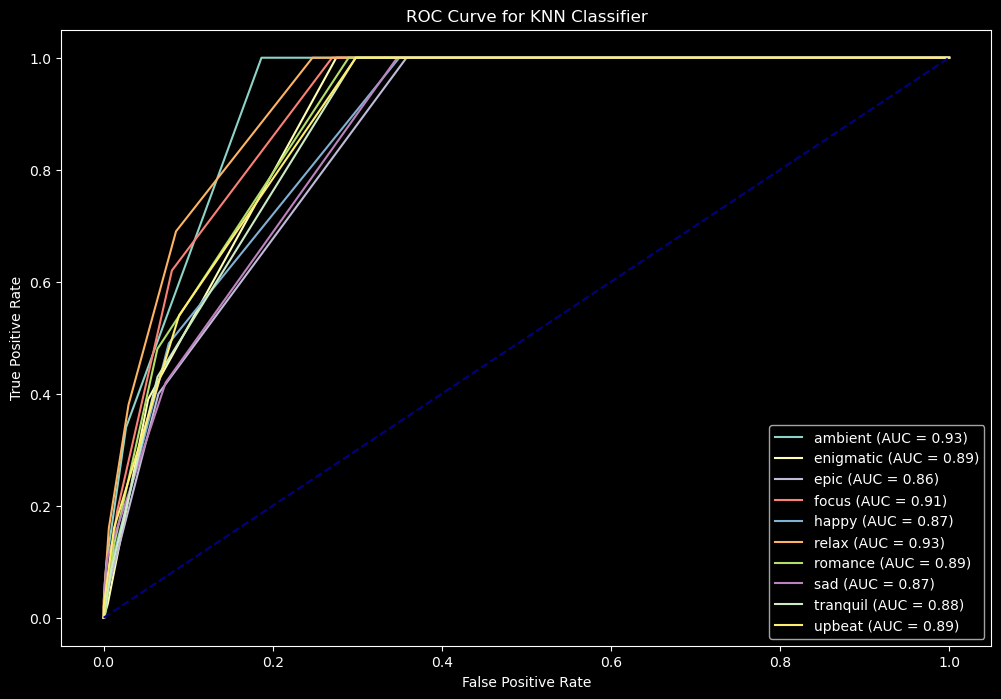

In [20]:
classes = np.unique(y_train)
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_train == classes[i], knn_classifier.predict_proba(X_train)[:, i])
    roc_auc = roc_auc_score(y_train == classes[i], knn_classifier.predict_proba(X_train)[:, i])
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()